## Dependencies

### Library Installation (if needed)

In [4]:
#! pip install -qUr requirements.txt

In [5]:
from methods.screener_methods import *
from tqdm import tqdm
import pandas as pd

### Single import

,Ticker,Name,Signal,Recommendation Score,Value Score,Quality Score,Momentum Score,P/E Score,ROA Score,PB Score,...,P/E,ROA%,Earnings pr. Share,Price to Book,Insider Buy%,50d Average Change%,Sector,Industry,Country,Owned
0,AMBU-B.CO,Ambu A/S,Sell,-0.62,-0.58,-0.05,0.01,-1.17,0.78,-0.19,...,38.82,6.61,2.28,3.91,0.0,0.0,Healthcare,Medical Devices,Denmark,False


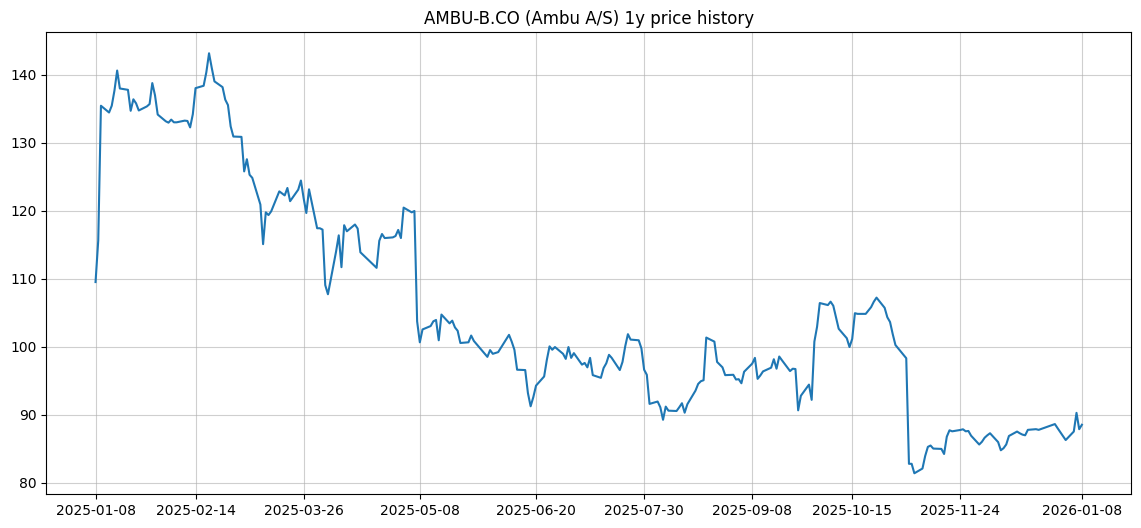

50d Average Change%: 0.004950911


In [6]:
symbol = "AMBU-B.CO"
stock = Stock(symbol)
display(stock.summary())
stock.price_graph("1y")
print(f"50d Average Change%: {stock.momentum}")


### Screener

In [7]:
symbol_list = "danish" #"simple", "danish", "filtered", "all"

if symbol_list == "all":
    symbols = (
        pd.read_csv("../data/tickers/tickers.csv")["Ticker"].tolist() + 
        pd.read_csv("../data/tickers/danish_tickers.csv")["Ticker"].tolist() + 
        pd.read_csv("../data/tickers/simple_tickers.csv")["Ticker"].to_list()
    )
elif symbol_list == "filtered":
    symbols = pd.read_csv("../data/tickers/screener_filtered_tickers.csv")["Ticker"].tolist()
elif symbol_list == "danish":
    symbols = pd.read_csv("../data/tickers/danish_tickers.csv")["Ticker"].tolist()
else:
    symbols = pd.read_csv("../data/tickers/simple_tickers.csv")["Ticker"].tolist()
symbols = list(set(symbols))

In [8]:
import sys, io
df = pd.DataFrame()
for symbol in tqdm(symbols, smoothing=0):
    old_stderr = sys.stderr
    sys.stderr = io.StringIO()
    try:
        df = pd.concat([df, Stock(symbol).summary()])
    except Exception:
        pass
    finally:
        sys.stderr = old_stderr
df = df.sort_values(by="Recommendation Score", ascending=False)
display(df)
if symbol_list == "simple":
    df.to_csv("../data/screener_results/simple_screener_results.csv", index=False)
elif symbol_list == "danish":
    df.to_csv("../data/screener_results/danish_screener_results.csv", index=False)
elif symbol_list == "filtered" or symbol_list == "all":   
    df.to_csv("../data/screener_results/screener_results.csv", index=False)
    df["Ticker"].to_csv("../data/tickers/screener_filtered_tickers.csv", index=False)

100%|██████████| 132/132 [02:31<00:00,  1.15s/it]


,Ticker,Name,Signal,Recommendation Score,Value Score,Quality Score,Momentum Score,P/E Score,ROA Score,PB Score,...,P/E,ROA%,Earnings pr. Share,Price to Book,Insider Buy%,50d Average Change%,Sector,Industry,Country,Owned
0,BAVA.CO,Bavarian Nordic A/S,Buy,2.48,2.08,0.36,0.04,1.04,0.92,0.12,...,6.48,7.78,30.70,1.18,0.0,0.02,Healthcare,Biotechnology,Denmark,False
0,GUBRA.CO,Gubra A/S,Buy,2.01,1.88,-0.00,0.13,1.08,1.00,-0.20,...,4.91,78.15,106.08,7.01,0.0,0.09,Healthcare,Biotechnology,Denmark,True
0,ZEAL.CO,Zealand Pharma A/S,Buy,1.93,2.07,0.02,-0.16,1.09,1.00,-0.02,...,4.65,33.45,91.31,1.97,0.0,-0.13,Healthcare,Biotechnology,Denmark,True
0,ROCK-B.CO,Rockwool A/S ser. B,Buy,1.90,1.64,0.20,0.05,0.68,0.99,-0.02,...,12.70,9.94,17.71,1.99,0.0,0.03,Industrials,Building Products & Equipment,Denmark,True
0,NOVO-B.CO,Novo Nordisk B A/S,Buy,1.87,1.15,0.54,0.18,0.35,1.00,-0.20,...,15.87,21.11,23.34,9.69,0.0,0.17,Healthcare,Drug Manufacturers - General,Denmark,True
0,PNDORA.CO,Pandora A/S,Buy,1.82,1.67,0.28,-0.13,0.87,1.00,-0.20,...,10.19,18.43,66.40,17.97,0.0,-0.09,Consumer Cyclical,Luxury Goods,Denmark,True
0,HLUN-B.CO,H. Lundbeck A/S B,Buy,1.78,1.75,0.03,0.01,0.77,0.95,0.03,...,11.55,8.28,3.84,1.75,0.0,0.00,Healthcare,Drug Manufacturers - Specialty & Generic,Denmark,False
0,STG.CO,Scandinavian Tobacco Group A/S,Buy,1.74,1.45,0.22,0.07,0.85,0.45,0.15,...,10.39,5.37,9.20,0.90,0.0,0.05,Consumer Defensive,Tobacco,Denmark,True
0,GMAB.CO,Genmab A/S,Buy,1.55,1.29,0.15,0.11,0.48,1.00,-0.19,...,14.73,13.38,145.99,3.60,0.0,0.08,Healthcare,Biotechnology,Denmark,True
0,SPG.CO,SP Group A/S,Buy,1.27,0.94,0.16,0.17,0.17,0.86,-0.10,...,17.33,7.13,20.11,2.40,0.0,0.17,Basic Materials,Specialty Chemicals,Denmark,True
